In [1]:
#####################
#Load packages
#####################
!pip install qutip
import numpy as np
import scipy as sp
from numpy import linalg as LA
from qutip import *
#import quanestimation as qest
from qutip.sparse import sp_eigs
import matplotlib.pyplot as plt
from scipy import linalg
import math
import cmath
from qutip import tensor, qeye, identity, sigmaz, sigmam, sigmap, Qobj
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable


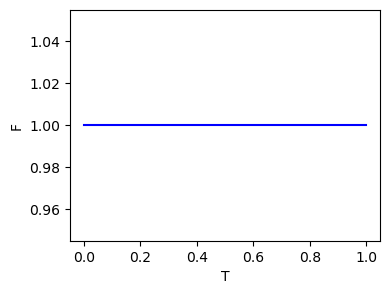

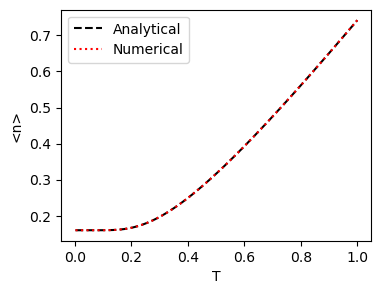

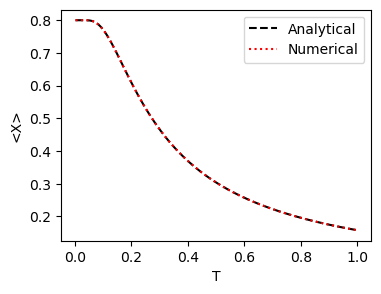

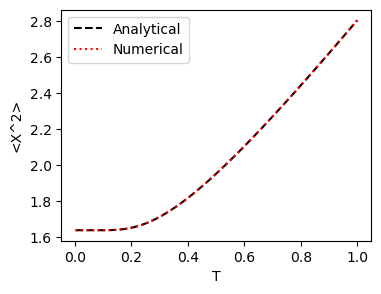

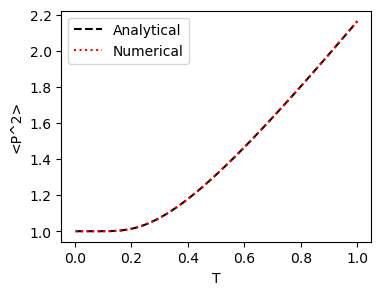

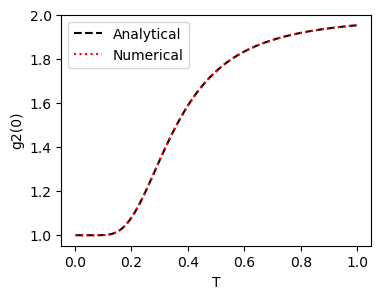

In [21]:
################# Parameters and Operators ################
N_res = 30  # Hilbert space dimension of the system
ωq= 0.4
ω_res = 1
ωp= ωq + ω_res
ωm= ωq - ω_res
g = 0.4
η = g/ω_res
ωc = 1  # cut-off frequency
s = 1  # ohmicity parameter
ks = 1  # constant factor in the spectral density

#the field operators
a = tensor(destroy(N_res),qeye(2)) #system
ad = tensor(create(N_res),qeye(2)) #system
sz = tensor(qeye(N_res),sigmaz()) #ancillary
sp = tensor(qeye(N_res),sigmap()) #ancillary
sm = tensor(qeye(N_res),sigmam()) #ancillary
a1 = destroy(N_res) #system
ad1 = create(N_res) #system

H = 0.5 * ωq * sz + ω_res * ad * a + g * sz * (a + ad)  # the Hamiltonian


######################################## Master Equation ###############################################
temp_vec = np.linspace(0.002, 1, 100)

n_numerical = np.zeros(len(temp_vec),dtype=complex)
n_analytical =np.zeros(len(temp_vec),dtype=complex)

g2_numerical = np.zeros(len(temp_vec),dtype=complex)
g2_analytical =np.zeros(len(temp_vec),dtype=complex)

x_numerical = np.zeros(len(temp_vec),dtype=complex)
x_analytical =np.zeros(len(temp_vec),dtype=complex)

x2_numerical = np.zeros(len(temp_vec),dtype=complex)
x2_analytical =np.zeros(len(temp_vec),dtype=complex)

p2_numerical = np.zeros(len(temp_vec),dtype=complex)
p2_analytical =np.zeros(len(temp_vec),dtype=complex)

a_1 = np.zeros(len(temp_vec),dtype=complex)
a_2 =np.zeros(len(temp_vec),dtype=complex)

fid_list =np.zeros(len(temp_vec),dtype=complex)



for i in range(len(temp_vec)):

    Tb = temp_vec[i]
    beta = 1/Tb
    θ = g/ω_res
    n_th = n_thermal(ω_res, Tb)

    H_sys = 0.5*ωq*sz+ ω_res*ad*a + g * sz * (a + a.dag())
    part= (-beta*H_sys).expm().tr()
    ρ_tr_bk = ((-beta*H_sys).expm()/part)

    # Tracing out the ancilliary density matrix (qubit)
    ρ_tr = ρ_tr_bk.ptrace([0])
    n_numerical[i] = np.real(expect(ad1 * a1, ρ_tr))
    x_numerical[i] = np.real(expect((ad1 + a1), ρ_tr))
    x2_numerical[i] = np.real(expect((ad1 + a1)**2, ρ_tr))
    p2_numerical[i] = np.real(expect((1j*(a1 - ad1))**2, ρ_tr))
    g2_numerical[i] = np.real(expect(ad1*ad1*a1*a1, ρ_tr))/( n_numerical[i]**2)


    #Defining thermal coherent state (TCS)
    a1 = destroy(N_res) #system
    ad1 = create(N_res) #system
    H_res = ω_res*ad1*a1
    beta = 1/Tb
    p = 1/(1 + np.exp(beta * ωq))
    part = (linalg.expm(-beta*H_res)).trace()
    rho_r = Qobj(linalg.expm(-beta*H_res)/part)
    rho_DTS = p*((-θ*(ad1-a1)).expm()*rho_r*(θ*(ad1-a1)).expm())+(1-p)*((θ*(ad1-a1)).expm()*rho_r*(-θ*(ad1-a1)).expm())

    n_analytical[i] =   θ**2 + n_th
    x_analytical[i] =  (2*θ)*(1-2*p)
    x2_analytical[i] = 2*n_th+4*θ**2+1
    p2_analytical[i] = 2*n_th+1
    g2_analytical[i] = (θ**4 + 2*n_th**2 + 4*n_th*θ**2)/(n_th+θ**2)**2
    #mean_phot2[i] = n_thermal(ω_res, Tb) + θ**2
    #a_1[i] =  np.real(expect(a1, rho_DTS)) + np.real(expect(ad1, rho_DTS))
    #a_2[i] =  2*θ*(1-p) - 2*θ*p

    #print(np.real(fidelity(ρ_tr, rho_DTS)))
    fid_list[i] = round(np.real(fidelity(ρ_tr, rho_DTS)),4)




plt.figure(figsize=(4, 3))
fig5=plt.plot(temp_vec, fid_list,color="b")
plt.xlabel('T')
plt.ylabel('F')


plt.figure(figsize=(4, 3))
plt.plot(temp_vec, n_analytical, color="k", linestyle='dashed', label='Analytical')
plt.plot(temp_vec, n_numerical, color="red", label='Numerical', linestyle='dotted')
plt.xlabel('T')
plt.ylabel('<n>')
plt.legend()
plt.show()

plt.figure(figsize=(4, 3))
plt.plot(temp_vec, x_analytical, color="k", linestyle='dashed', label='Analytical')
plt.plot(temp_vec, x_numerical, color="red", label='Numerical', linestyle='dotted')
plt.xlabel('T')
plt.ylabel('<X>')
plt.legend()
plt.show()

plt.figure(figsize=(4, 3))
plt.plot(temp_vec, x2_analytical, color="k", linestyle='dashed', label='Analytical')
plt.plot(temp_vec, x2_numerical, color="red", label='Numerical', linestyle='dotted')
plt.xlabel('T')
plt.ylabel('<X^2>')
plt.legend()
plt.show()

plt.figure(figsize=(4, 3))
plt.plot(temp_vec, p2_analytical, color="k", linestyle='dashed', label='Analytical')
plt.plot(temp_vec, p2_numerical, color="red", label='Numerical', linestyle='dotted')
plt.xlabel('T')
plt.ylabel('<P^2>')
plt.legend()
plt.show()

plt.figure(figsize=(4, 3))
plt.plot(temp_vec, g2_analytical, color="k", linestyle='dashed', label='Analytical')
plt.plot(temp_vec, g2_numerical, color="red", label='Numerical', linestyle='dotted')
plt.xlabel('T')
plt.ylabel('g2(0)')
plt.legend()
plt.show()